# this is practice making plots and saving files based off one file

In [2]:
#numeric python module, useful for handling large data arrays
import numpy as np

#module for dealing with netCDF files (all sat files are netCDF)
import netCDF4 as nc

#modules for making plots. Here wer are importing the full matplotlib
#module, but also the sub-module pyplot separately with an abbreviated
#name so it is easier to use in the code
import matplotlib.pyplot as plt
import matplotlib

#for displaying the plots in this notebook 
%matplotlib inline

#module for making maps
from mpl_toolkits.basemap import Basemap

#miscellaneous operating system interfaces module for doing things like
#moving file, exploring directory paths, etc..
import os
import re

In [4]:
#full path of the satellite file
L3file = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/globe/A20031822003212.L3m_MO_IOP_adg_443_giop_4km.nc'

fileinfo = nc.Dataset(L3file) #loading the file metadata (from the netcdf module)

L3data = {} #making an empty dictionary to store the L3 data

#reading the variable, latitude & longitude data from the file
#and adding it to the dictionary
#dictionary keys are: lat, long, adg443
#dictionary items are arrays
L3data['lat'] = fileinfo.variables['lat'][:]
L3data['lon'] = fileinfo.variables['lon'][:]
adg443 = fileinfo.variables['adg_443_giop'][:,:]

#extracting the data and setting the masked values to NaN 
#(need to do this for plotting)
L3data['adg443'] = adg443.data
L3data['adg443'][np.ma.getmask(adg443)] = np.nan

#putting the lat and lons on a regular grid (using the numpy module)
L3data['lon'],L3data['lat'] = np.meshgrid(L3data['lon'],L3data['lat'])

In [ ]:
##now lets plot the data
fig1 = plt.figure(figsize=(10,8)) #creating the figure area

#setting the parameters for the "basemap"
#i.e.type of map projection, where to center image, how course the
#coastline should be, etc...
m = Basemap(projection='cyl',lon_0=0,resolution='c')

#filling in the continents and drawing the coastlines and country boundaries
m.fillcontinents(color='0.6', lake_color='white')
m.drawcoastlines(color='0.3', linewidth=0.5)
m.drawcountries(color='0.3', linewidth=0.5)

#drawing the lines of long and lat
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0],fontsize=10,
                linewidth = 0.5,dashes=[2,1],color='0.2')
m.drawmeridians(np.arange(-150.,180.,60.),labels=[0,0,0,1], fontsize=10,
                linewidth = 0.5,dashes=[2,1],color='0.2')

#turning lats and lons to x, y coordinates
x,y = m(L3data['lon'],L3data['lat'])

#plotting the data on a log scale
m.pcolormesh(x,y,L3data['adg443'],shading='flat',latlon=False)

#setting the colormap to viridis and the NaNs and any values
#below to lower color limit to white
cmp = plt.cm.viridis
cmp.set_under('w')

#plotting colorbar and formatting the labels
cb = m.colorbar(format='%.6g',label='adg(443)',ticks=[0.001,0.01,0.1,1])

#saving the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Code/adg443_july2002_globe'
plt.savefig(filename1+'.tif',dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()


### practice taking a subset of GoM without georges bank

In [10]:
##taking a subset of the globe
#specifying the edges of the subscene in lat&long coordinates
east = -65
west = -72
north = 47
south = 41
#turning the lats and lons into indices within the data array
#so we can then extract the data easily using the above defined func
right = np.find_nearest(L3data['lon'][0,:],east)
left = np.find_nearest(L3data['lon'][0,:],west)
top = np.find_nearest(L3data['lat'][:,0],north)
bottom = np.find_nearest(L3data['lat'][:,0],south)
        
#extracting the subscene
subset = L3data['adg443'][top:bottom,left:right]
subset_lon = L3data['lon'][top:bottom,left:right]
subse_lat = L3data['lat'][top:bottom,left:right]




AttributeError: module 'numpy' has no attribute 'find_nearest'

In [8]:
##plot what we just did
fig1 = plt.figure(figsize=(10,8)) #creating the figure area

#setting the parameters for the "basemap" i.e. type of map projection
#,where to center the image, how course the coastline should be, etc.
m = Basemap(projection='cyl',resolution='c',llcrnrlon = west,
           llcrnrlat = south, urcrnrlon=east, urcrnrlat=north)

#filling in the continents and drawing the coastlines
#and country boundaries
m.fillcontinents(color='0.6', lake_color='white')
m.drawcoastlines(color='0.3', linewidth=0.5)
m.drawcountries(color='0.3', linewidth=0.5)

#drawing the lines of long and lat
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0],fontsize=10,
                linewidth = 0.5,dashes=[2,1],color='0.2')
m.drawmeridians(np.arange(-150.,180.,60.),labels=[0,0,0,1], fontsize=10,
                linewidth = 0.5,dashes=[2,1],color='0.2')

#turning lats and lons to x, y coordinates
x,y = m(L3data['lon'],L3data['lat'])
print(len(x,y))
#plotting the data on a log scale
m.pcolormesh(x,y,L3data['adg443'],shading='flat',latlon=False,
            norm=matplotlib.colors.LogNorm(vmin=0.001,vmax=1))

#setting the colormap to viridis and the NaNs and any values
#below to lower color limit to white
cmp = plt.cm.viridis
cmp.set_under('w')

#plotting colorbar and formatting the labels
cb = m.colorbar(format='%.6g',label='adg(443)',ticks=[0.001,0.01,0.1,1])

#saving the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Code/adg443_july2002_subscene'
plt.savefig(filename1+'.tif',dpi=300)




NameError: name 'west' is not defined

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


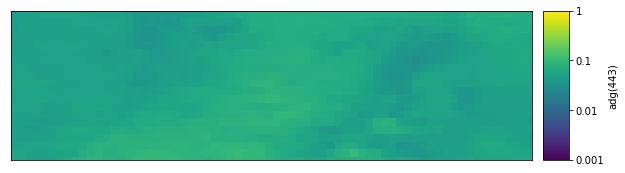

In [18]:
###GEORGES BANK 
#specifying the edges of the subscene in lat & lon coordinates
#subscene = Georges Bank
east = -66
west = -68.81
north = 42.354
south = 41.55

      
#turning the lats and lons into indices within the data array
#so we can then extract the data easily using the above defined func
right = find_nearest(L3data['lon'][0,:],east)
left = find_nearest(L3data['lon'][0,:],west)
top = find_nearest(L3data['lat'][:,0],north)
bottom = find_nearest(L3data['lat'][:,0],south)
        
#extracting the subscene
subset = L3data['adg443'][top:bottom,left:right]
subset_lon = L3data['lon'][top:bottom,left:right]
subse_lat = L3data['lat'][top:bottom,left:right]



##plot what we just did
fig1 = plt.figure(figsize=(10,8)) #creating the figure area

#setting the parameters for the "basemap" i.e. type of map projection
#,where to center the image, how course the coastline should be, etc.
m = Basemap(projection='cyl',resolution='c',llcrnrlon = west,
           llcrnrlat = south, urcrnrlon=east, urcrnrlat=north)

#filling in the continents and drawing the coastlines
#and country boundaries
m.fillcontinents(color='0.6', lake_color='white')
m.drawcoastlines(color='0.3', linewidth=0.5)
m.drawcountries(color='0.3', linewidth=0.5)

#drawing the lines of long and lat
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0],fontsize=10,
                linewidth = 0.5,dashes=[2,1],color='0.2')
m.drawmeridians(np.arange(-150.,180.,60.),labels=[0,0,0,1], fontsize=10,
                linewidth = 0.5,dashes=[2,1],color='0.2')

#turning lats and lons to x, y coordinates
x,y = m(L3data['lon'],L3data['lat'])

#plotting the data on a log scale
m.pcolormesh(x,y,L3data['adg443'],shading='flat',latlon=False,
            norm=matplotlib.colors.LogNorm(vmin=0.001,vmax=1))

#setting the colormap to viridis and the NaNs and any values
#below to lower color limit to white
cmp = plt.cm.viridis
cmp.set_under('w')

#plotting colorbar and formatting the labels
cb = m.colorbar(format='%.6g',label='adg(443)',ticks=[0.001,0.01,0.1,1])

#saving the file
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Code/adg443_july2002_subscene'
plt.savefig(filename2+'.tif',dpi=300)


/Users/clarabirdferrer/Documents/Bigelow/Code/adg443_july2002_subscene


/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


TypeError: string indices must be integers

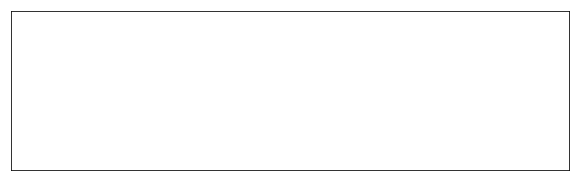

In [23]:
##subtract georges bank from GoM all
if filename2 in filename1:
            filename1.replace(filename2,'np.nan')


##plot what we just did
fig1 = plt.figure(figsize=(10,8)) #creating the figure area

#setting the parameters for the "basemap" i.e. type of map projection
#,where to center the image, how course the coastline should be, etc.
m = Basemap(projection='cyl',resolution='c',llcrnrlon = west,
           llcrnrlat = south, urcrnrlon=east, urcrnrlat=north)

#filling in the continents and drawing the coastlines
#and country boundaries
m.fillcontinents(color='0.6', lake_color='white')
m.drawcoastlines(color='0.3', linewidth=0.5)
m.drawcountries(color='0.3', linewidth=0.5)

#drawing the lines of long and lat
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0],fontsize=10,
                linewidth = 0.5,dashes=[2,1],color='0.2')
m.drawmeridians(np.arange(-150.,180.,60.),labels=[0,0,0,1], fontsize=10,
                linewidth = 0.5,dashes=[2,1],color='0.2')

#turning lats and lons to x, y coordinates
x,y = m(filename1['lon'],filename1['lat'])

#plotting the data on a log scale
m.pcolormesh(x,y,filename1['adg443'],shading='flat',latlon=False,
            norm=matplotlib.colors.LogNorm(vmin=0.001,vmax=1))

#setting the colormap to viridis and the NaNs and any values
#below to lower color limit to white
cmp = plt.cm.viridis
cmp.set_under('w')

#plotting colorbar and formatting the labels
cb = m.colorbar(format='%.6g',label='adg(443)',ticks=[0.001,0.01,0.1,1])

#saving the file
filename3 = '/Users/clarabirdferrer/Documents/Bigelow/Code/adg443_july2002_subscene'
plt.savefig(filename3 +'.tif',dpi=300)


In [61]:
subset[subset < -30000] = np.nan

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [32]:
datafile = '/Users/clarabirdferrer/Documents/Bigelow/Code/adg443_july2002_subset_data'
latfile = '/Users/clarabirdferrer/Documents/Bigelow/Code/adg443_july2002_subset_lat'
lonfile ='/Users/clarabirdferrer/Documents/Bigelow/Code/adg443_july2002_subset_lon'

np.savetxt(datafile, subset, fmt='%.6f')
np.savetxt(latfile, subset, fmt='%.6f')
np.savetxt(lonfile, subset, fmt='%.6f')

# this makes the loops to analyze all the files at once

In [156]:
#specify the directory where all the files are saved
L3filesdir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/globe'

#list all the files in the directory using the os module
L3files_all=os.listdir(L3filesdir)

#combining the directory path with the file names
#to have a list of files with the full path
L3files_all = [L3filesdir + '/' + f for f in L3files_all]

In [ ]:
###this one makes loops for each algorithm
#specifying the edges of the subscene in lat & lon coordinates
east = -65
west = -72
north = 47
south = 41

#defining a function that searches for the element
#nearest a particular values within an array, and returns
#the position (or index) of that element
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

#files with .nc and separating files by algorithm product
ncfiles=[]
for ff in L3files_all:
    M = re.search('.nc',ff)
    if M:
        ncfiles += [ff]
        
giopfiles = []     #giop algorithm
gsmfiles= []       #gsm algorithm
qaafiles = []      #qaa algorithm
for ff in ncfiles:
    M = re.search('giop',ff)
    if M:
        giopfiles += [ff]
    elif not M:
        N = re.search('qaa',ff)
        if N:
            qaafiles += [ff]
        else:
            gsmfiles += [ff]

            
###looping through each file based on algorithm and saving in folder based on algorithm           
            
            
##GIOP ALORITHM LOOP            
#number of L3 files
numfiles = len(giopfiles)
        
#looping through each file, doing as detailed in the above 
#section for subsetting data
L3data = {}
for ii in range(0,numfiles):
    print (ii)
    L3file = giopfiles[ii]
    fileinfo = nc.Dataset(L3file)
    L3data['lat'] = fileinfo.variables['lat'][:]
    L3data['lon'] = fileinfo.variables['lon'][:]
    L3data['adg443'] = fileinfo.variables['adg_443_giop'][:,:]
    
    L3data['lon'],L3data['lat']=np.meshgrid(L3data['lon'],L3data['lat'])
    
    #turning the lats and lons into indices within the data array
    #so we can then extract the data easily using the above defined func
    right = find_nearest(L3data['lon'][0,:],east)
    left = find_nearest(L3data['lon'][0,:],west)
    top = find_nearest(L3data['lat'][:,0],north)
    bottom = find_nearest(L3data['lat'][:,0],south)
        
    #extracting the subscene
    subset = L3data['adg443'][top:bottom,left:right]
    subset_lon = L3data['lon'][top:bottom,left:right]
    subse_lat = L3data['lat'][top:bottom,left:right]
    
    #extract date sequence from file name
    r = re.compile("[0-9]{7}")
    m = r.search (L3file)
    if m:
        d = m.group(0)
        month = d[4:]
        year = d[:4]
        
        if year != ('2004') or ('2008') or ('2012'):   ##non leap year years
            if month == '001':
                month = '01'
            elif month == '032':
                month = '02'
            elif month == '060':
                month = '03'
            elif month == '091':
                month = '04'
            elif month == '121':
                month = '05'
            elif month == '152':
                month = '06'
            elif month == '182':
                month = '07'
            elif month == '213':
                month = '08'
            elif month == '244':
                month = '09'
            elif month == '274':
                month = '10'
            elif month == '305':
                month = '11'
            elif month == '335':
                month = '12'
            
        else:                         ##leap years 2004, 2008, 2012
            if month == '001':
                month = '01'
            elif month == '032':
                month = '02'
            elif month == '061':
                month = '03'
            elif month == '092':
                month = '04'
            elif month == '122':
                month = '05'
            elif month == '153':
                month = '06'
            elif month == '183':
                month = '07'
            elif month == '214':
                month = '08'
            elif month == '245':
                month = '09'
            elif month == '275':
                month = '10'
            elif month == '306':
                month = '11'
            elif month == '336':
                month = '12'    
       
        date = year + month
        print(date)
        
    #subset of values to nan
    
    subset[subset < -30000] = np.nan
    
    #save files as the loop runs
    datafile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop/adg443.giop_subset_data'
    latfile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop/adg443.giop_subset_lat'
    lonfile ='/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop/adg443.giop_subset_lon'

    np.savetxt(datafile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(latfile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(lonfile + '_' + year + '_' + month, subset, fmt='%.6f')

    
##QAA ALGORITHM LOOP
#number of L3 files
numfiles = len(qaafiles)
        
#looping through each file, doing as detailed in the above 
#section for subsetting data
L3data = {}
for ii in range(0,numfiles):
    print (ii)
    L3file = qaafiles[ii]
    fileinfo = nc.Dataset(L3file)
    L3data['lat'] = fileinfo.variables['lat'][:]
    L3data['lon'] = fileinfo.variables['lon'][:]
    L3data['adg443'] = fileinfo.variables['adg_443_qaa'][:,:]
    
    L3data['lon'],L3data['lat']=np.meshgrid(L3data['lon'],L3data['lat'])
    
    #turning the lats and lons into indices within the data array
    #so we can then extract the data easily using the above defined func
    right = find_nearest(L3data['lon'][0,:],east)
    left = find_nearest(L3data['lon'][0,:],west)
    top = find_nearest(L3data['lat'][:,0],north)
    bottom = find_nearest(L3data['lat'][:,0],south)
        
    #extracting the subscene
    subset = L3data['adg443'][top:bottom,left:right]
    subset_lon = L3data['lon'][top:bottom,left:right]
    subse_lat = L3data['lat'][top:bottom,left:right]
    
    #extract date sequence from file name
    r = re.compile("[0-9]{7}")
    m = r.search (L3file)
    if m:
        d = m.group(0)
        month = d[4:]
        year = d[:4]
        
        if year != ('2004') or ('2008') or ('2012'):   ##non leap year years
            if month == '001':
                month = '01'
            elif month == '032':
                month = '02'
            elif month == '060':
                month = '03'
            elif month == '091':
                month = '04'
            elif month == '121':
                month = '05'
            elif month == '152':
                month = '06'
            elif month == '182':
                month = '07'
            elif month == '213':
                month = '08'
            elif month == '244':
                month = '09'
            elif month == '274':
                month = '10'
            elif month == '305':
                month = '11'
            elif month == '335':
                month = '12'
            
        else:                         ##leap years 2004, 2008, 2012
            if month == '001':
                month = '01'
            elif month == '032':
                month = '02'
            elif month == '061':
                month = '03'
            elif month == '092':
                month = '04'
            elif month == '122':
                month = '05'
            elif month == '153':
                month = '06'
            elif month == '183':
                month = '07'
            elif month == '214':
                month = '08'
            elif month == '245':
                month = '09'
            elif month == '275':
                month = '10'
            elif month == '306':
                month = '11'
            elif month == '336':
                month = '12'    
       
        date = year + month
        print(date)
        
    #subset of values to nan
    
    subset[subset < -30000] = np.nan
    
    #save files as the loop runs
    datafile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/qaa/adg443.qaa_subset_data'
    latfile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/qaa/adg443.qaa_subset_lat'
    lonfile ='/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/qaa/adg443.qaa_subset_lon'

    np.savetxt(datafile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(latfile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(lonfile + '_' + year + '_' + month, subset, fmt='%.6f')

    

##GSM ALGORITHM LOOP    
#number of L3 files
numfiles = len(gsmfiles)
        
#looping through each file, doing as detailed in the above 
#section for subsetting data
L3data = {}
for ii in range(0,numfiles):
    print (ii)
    L3file = gsmfiles[ii]
    fileinfo = nc.Dataset(L3file)
    L3data['lat'] = fileinfo.variables['lat'][:]
    L3data['lon'] = fileinfo.variables['lon'][:]
    L3data['adg443'] = fileinfo.variables['adg_443_gsm'][:,:]
    
    L3data['lon'],L3data['lat']=np.meshgrid(L3data['lon'],L3data['lat'])
    
    #turning the lats and lons into indices within the data array
    #so we can then extract the data easily using the above defined func
    right = find_nearest(L3data['lon'][0,:],east)
    left = find_nearest(L3data['lon'][0,:],west)
    top = find_nearest(L3data['lat'][:,0],north)
    bottom = find_nearest(L3data['lat'][:,0],south)
        
    #extracting the subscene
    subset = L3data['adg443'][top:bottom,left:right]
    subset_lon = L3data['lon'][top:bottom,left:right]
    subse_lat = L3data['lat'][top:bottom,left:right]
    
    #extract date sequence from file name
    r = re.compile("[0-9]{7}")
    m = r.search (L3file)
    if m:
        d = m.group(0)
        month = d[4:]
        year = d[:4]
        
        if year != ('2004') or ('2008') or ('2012'):   ##non leap year years
            if month == '001':
                month = '01'
            elif month == '032':
                month = '02'
            elif month == '060':
                month = '03'
            elif month == '091':
                month = '04'
            elif month == '121':
                month = '05'
            elif month == '152':
                month = '06'
            elif month == '182':
                month = '07'
            elif month == '213':
                month = '08'
            elif month == '244':
                month = '09'
            elif month == '274':
                month = '10'
            elif month == '305':
                month = '11'
            elif month == '335':
                month = '12'
            
        else:                         ##leap years 2004, 2008, 2012
            if month == '001':
                month = '01'
            elif month == '032':
                month = '02'
            elif month == '061':
                month = '03'
            elif month == '092':
                month = '04'
            elif month == '122':
                month = '05'
            elif month == '153':
                month = '06'
            elif month == '183':
                month = '07'
            elif month == '214':
                month = '08'
            elif month == '245':
                month = '09'
            elif month == '275':
                month = '10'
            elif month == '306':
                month = '11'
            elif month == '336':
                month = '12'    
       
        date = year + month
        print(date)
        
    #subset of values to nan
    
    subset[subset < -30000] = np.nan
    
    #save files as the loop runs
    datafile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/gsm/adg443.gsm_subset_data'
    latfile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/gsm/adg443.gsm_subset_lat'
    lonfile ='/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/gsm/adg443.gsm_subset_lon'

    np.savetxt(datafile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(latfile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(lonfile + '_' + year + '_' + month, subset, fmt='%.6f')


0
200207
1


/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:134: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


200208
2
200209
3
200210
4
200211
5
200212
6
200301
7
200302
8
200303
9
200304
10
200305
11
200306
12
200307
13
200308
14
200309
15
200310
16
200311
17
200312
18
200401
19
200402
20
2004061
21
2004092
22
2004122
23
2004153
24
2004183
25
2004214
26
2004245
27
2004275
28
2004306
29
2004336
30
200501
31
200502
32
200503
33
200504
34
200505
35
200506
36
200507
37
200508
38
200509
39
200510
40
200511
41
200512
42
200601
43
200602
44
200603
45
200604
46
200605
47
200606
48
200607
49
200608
50
200609
51
200610
52
200611
53
200612
54
200701
55
200702
56
200703
57
200704
58
200705
59
200706
60
200707
61
200708
62
200709
63
200710
64
200711
65
200712
66
200801
67
200802
68
2008061
69
2008092
70
2008122
71
2008153
72
2008183
73
2008214
74
2008245
75
2008275
76
2008306
77
2008336
78
200901
79
200902
80
200903
81
200904
82
200905
83
200906
84
200907
85
200908
86
200909
87
200910
88
200911
89
200912
90
201001
91
201002
92
201003
93
201004
94
201005
95
201006
96
201007
97
201008
98
201009
99
201010
1

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:240: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


200208
2
200209
3
200210
4
200211
5
200212
6
200301
7
200302
8
200303
9
200304
10
200305
11
200306
12
200307
13
200308
14
200309
15
200310
16
200311
17
200312
18
200401
19
200402
20
2004061
21
2004092
22
2004122
23
2004153
24
2004183
25
2004214
26
2004245
27
2004275
28
2004306
29
2004336
30
200501
31
200502
32
200503
33
200504
34
200505
35
200506
36
200507
37
200508
38
200509
39
200510
40
200511
41
200512
42
200601
43
200602
44
200603
45
200604
46
200605
47
200606
48
200607
49
200608
50
200609
51
200610
52
200611
53
200612
54
200701
55
200702
56
200703
57
200704
58
200705
59
200706
60
200707
61
200708
62
200709
63
200710
64
200711
65
200712
66
200801
67
200802
68
2008061
69
2008092
70
2008122
71
2008153
72
2008183
73
2008214
74
2008245
75
2008275
76
2008306
77
2008336
78
200901
79
200902
80


# practice
this is just practice for incorporating the name of the file into the loop and saving all the files

In [8]:
##practice incoporating name into loop
#specify the directory where all the files are saved
L3filesdir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice'

#list all the files in the directory using the os module
L3files_all=os.listdir(L3filesdir)

#combining the directory path with the file names
#to have a list of files with the full path
L3files_all = [L3filesdir + '/' + f for f in L3files_all]

In [14]:
#specifying the edges of the subscene in lat & lon coordinates
east = -65
west = -72
north = 47
south = 41

#defining a function that searches for the element
#nearest a particular values within an array, and returns
#the position (or index) of that element
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

#files with .nc and separating files by algorithm product
ncfiles=[]
for ff in L3files_all:
    M = re.search('.nc',ff)
    if M:
        ncfiles += [ff]
        
giopfiles = []     #giop algorithm
gsmfiles= []       #gsm algorithm
qaafiles = []      #qaa algorithm
for ff in ncfiles:
    M = re.search('giop',ff)
    if M:
        giopfiles += [ff]
    elif not M:
        N = re.search('qaa',ff)
        if N:
            qaafiles += [ff]
        else:
            gsmfiles += [ff]

#number of L3 files
numfiles = len(giopfiles)
        
#looping through each file, doing as detailed in the above 
#section for subsetting data
L3data = {}
for ii in range(0,numfiles):
    print (ii)
    L3file = giopfiles[ii]
    fileinfo = nc.Dataset(L3file)
    L3data['lat'] = fileinfo.variables['lat'][:]
    L3data['lon'] = fileinfo.variables['lon'][:]
    L3data['adg443'] = fileinfo.variables['adg_443_giop'][:,:]
    
    L3data['lon'],L3data['lat']=np.meshgrid(L3data['lon'],L3data['lat'])
    
    #turning the lats and lons into indices within the data array
    #so we can then extract the data easily using the above defined func
    right = find_nearest(L3data['lon'][0,:],east)
    left = find_nearest(L3data['lon'][0,:],west)
    top = find_nearest(L3data['lat'][:,0],north)
    bottom = find_nearest(L3data['lat'][:,0],south)
        
    #extracting the subscene
    subset = L3data['adg443'][top:bottom,left:right]
    subset_lon = L3data['lon'][top:bottom,left:right]
    subse_lat = L3data['lat'][top:bottom,left:right]
    
    #extract date sequence from file name
    r = re.compile("[0-9]{7}")
    m = r.search (L3file)
    if m:
        d = m.group(0)
        month = d[4:]
        year = d[:4]
        
        if month == '001':
            month = '001'
        elif month == '032':
            month = '032'
        elif month == '061':
            month = '060'
        elif month == '092':
            month = '091'
        elif month == '122':
            month = '121'
        elif month == '153':
            month = '152'
        elif month == '183':
            month = '182'
        elif month == '214':
            month = '213'
        elif month == '245':
            month = '244'
        elif month == '275':
            month = '274'
        elif month == '306':
            month = '305'
        elif month == '336':
            month = '335'
            
    
        if month == '001':
            month = '01'
        elif month == '032':
            month = '02'
        elif month == '060':
            month = '03'
        elif month == '091':
            month = '04'
        elif month == '121':
            month = '05'
        elif month == '152':
            month = '06'
        elif month == '182':
            month = '07'
        elif month == '213':
            month = '08'
        elif month == '244':
            month = '09'
        elif month == '274':
            month = '10'
        elif month == '305':
            month = '11'
        elif month == '335':
            month = '12'    

        date = year + month
        print(date)
        
    #subset of values to nan
    
    subset[subset < -30000] = np.nan
    
    #save files as the loop runs
    datafile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/adg443.giop_subset_data'
    latfile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/adg443.giop_subset_lat'
    lonfile ='/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/adg443.giop_subset_lon'

    np.savetxt(datafile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(latfile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(lonfile + '_' + year + '_' + month, subset, fmt='%.6f')

    

0
200301
1


/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:127: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


200302
2
200303
3
200304
4
200305
5
200306
6
200307
7
200308
8
200309
9
200310
10
200311
11
200312
12
200401
13
200402
14
200403
15
200404
16
200405
17
200406
18
200407
19
200408
20
200409
21
200410
22
200411
23
200412


In [11]:
###this one makes loops for each algorithm
#specifying the edges of the subscene in lat & lon coordinates
east = -65
west = -72
north = 47
south = 41

#defining a function that searches for the element
#nearest a particular values within an array, and returns
#the position (or index) of that element
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

#files with .nc and separating files by algorithm product
ncfiles=[]
for ff in L3files_all:
    M = re.search('.nc',ff)
    if M:
        ncfiles += [ff]
        
giopfiles = []     #giop algorithm
gsmfiles= []       #gsm algorithm
qaafiles = []      #qaa algorithm
for ff in ncfiles:
    M = re.search('giop',ff)
    if M:
        giopfiles += [ff]
    elif not M:
        N = re.search('qaa',ff)
        if N:
            qaafiles += [ff]
        else:
            gsmfiles += [ff]

            
###looping through each file based on algorithm and saving in folder based on algorithm           
            
            
##GIOP ALORITHM LOOP            
#number of L3 files
numfiles = len(giopfiles)
        
#looping through each file, doing as detailed in the above 
#section for subsetting data
L3data = {}
for ii in range(0,numfiles):
    print (ii)
    L3file = giopfiles[ii]
    fileinfo = nc.Dataset(L3file)
    L3data['lat'] = fileinfo.variables['lat'][:]
    L3data['lon'] = fileinfo.variables['lon'][:]
    L3data['adg443'] = fileinfo.variables['adg_443_giop'][:,:]
    
    L3data['lon'],L3data['lat']=np.meshgrid(L3data['lon'],L3data['lat'])
    
    #turning the lats and lons into indices within the data array
    #so we can then extract the data easily using the above defined func
    right = find_nearest(L3data['lon'][0,:],east)
    left = find_nearest(L3data['lon'][0,:],west)
    top = find_nearest(L3data['lat'][:,0],north)
    bottom = find_nearest(L3data['lat'][:,0],south)
        
    #extracting the subscene
    subset = L3data['adg443'][top:bottom,left:right]
    subset_lon = L3data['lon'][top:bottom,left:right]
    subse_lat = L3data['lat'][top:bottom,left:right]
    
  #extract date sequence from file name
    r = re.compile("[0-9]{7}")
    m = r.search (L3file)
    if m:
        d = m.group(0)
        month = d[4:]
        year = d[:4]
        
        if month == '001':
            month = '001'
        elif month == '032':
            month = '032'
        elif month == '061':
            month = '060'
        elif month == '092':
            month = '091'
        elif month == '122':
            month = '121'
        elif month == '153':
            month = '152'
        elif month == '183':
            month = '182'
        elif month == '214':
            month = '213'
        elif month == '245':
            month = '244'
        elif month == '275':
            month = '274'
        elif month == '306':
            month = '305'
        elif month == '336':
            month = '335'
            
    
        if month == '001':
            month = '01'
        elif month == '032':
            month = '02'
        elif month == '060':
            month = '03'
        elif month == '091':
            month = '04'
        elif month == '121':
            month = '05'
        elif month == '152':
            month = '06'
        elif month == '182':
            month = '07'
        elif month == '213':
            month = '08'
        elif month == '244':
            month = '09'
        elif month == '274':
            month = '10'
        elif month == '305':
            month = '11'
        elif month == '335':
            month = '12'     
       
        date = year + month
        print(date)
        
    #subset of values to nan
    
    subset[subset < -30000] = np.nan
    
    #save files as the loop runs
    datafile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/giop/adg443.giop_subset_data'
    latfile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/giop/adg443.giop_subset_lat'
    lonfile ='/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/giop/adg443.giop_subset_lon'

    np.savetxt(datafile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(latfile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(lonfile + '_' + year + '_' + month, subset, fmt='%.6f')

    
##QAA ALGORITHM LOOP
#number of L3 files
numfiles = len(qaafiles)
        
#looping through each file, doing as detailed in the above 
#section for subsetting data
L3data = {}
for ii in range(0,numfiles):
    print (ii)
    L3file = qaafiles[ii]
    fileinfo = nc.Dataset(L3file)
    L3data['lat'] = fileinfo.variables['lat'][:]
    L3data['lon'] = fileinfo.variables['lon'][:]
    L3data['adg443'] = fileinfo.variables['adg_443_qaa'][:,:]
    
    L3data['lon'],L3data['lat']=np.meshgrid(L3data['lon'],L3data['lat'])
    
    #turning the lats and lons into indices within the data array
    #so we can then extract the data easily using the above defined func
    right = find_nearest(L3data['lon'][0,:],east)
    left = find_nearest(L3data['lon'][0,:],west)
    top = find_nearest(L3data['lat'][:,0],north)
    bottom = find_nearest(L3data['lat'][:,0],south)
        
    #extracting the subscene
    subset = L3data['adg443'][top:bottom,left:right]
    subset_lon = L3data['lon'][top:bottom,left:right]
    subse_lat = L3data['lat'][top:bottom,left:right]
    
    #extract date sequence from file name
    r = re.compile("[0-9]{7}")
    m = r.search (L3file)
    if m:
        d = m.group(0)
        month = d[4:]
        year = d[:4]
        
        if month == '001':
            month = '001'
        elif month == '032':
            month = '032'
        elif month == '061':
            month = '060'
        elif month == '092':
            month = '091'
        elif month == '122':
            month = '121'
        elif month == '153':
            month = '152'
        elif month == '183':
            month = '182'
        elif month == '214':
            month = '213'
        elif month == '245':
            month = '244'
        elif month == '275':
            month = '274'
        elif month == '306':
            month = '305'
        elif month == '336':
            month = '335'
            
    
        if month == '001':
            month = '01'
        elif month == '032':
            month = '02'
        elif month == '060':
            month = '03'
        elif month == '091':
            month = '04'
        elif month == '121':
            month = '05'
        elif month == '152':
            month = '06'
        elif month == '182':
            month = '07'
        elif month == '213':
            month = '08'
        elif month == '244':
            month = '09'
        elif month == '274':
            month = '10'
        elif month == '305':
            month = '11'
        elif month == '335':
            month = '12'     
       
        date = year + month
        print(date)
        
    #subset of values to nan
    
    subset[subset < -30000] = np.nan
    
    #save files as the loop runs
    datafile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/qaa/adg443.qaa_subset_data'
    latfile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/qaa/adg443.qaa_subset_lat'
    lonfile ='/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/qaa/adg443.qaa_subset_lon'

    np.savetxt(datafile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(latfile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(lonfile + '_' + year + '_' + month, subset, fmt='%.6f')

    

##GSM ALGORITHM LOOP    
#number of L3 files
numfiles = len(gsmfiles)
        
#looping through each file, doing as detailed in the above 
#section for subsetting data
L3data = {}
for ii in range(0,numfiles):
    print (ii)
    L3file = gsmfiles[ii]
    fileinfo = nc.Dataset(L3file)
    L3data['lat'] = fileinfo.variables['lat'][:]
    L3data['lon'] = fileinfo.variables['lon'][:]
    L3data['adg443'] = fileinfo.variables['adg_443_gsm'][:,:]
    
    L3data['lon'],L3data['lat']=np.meshgrid(L3data['lon'],L3data['lat'])
    
    #turning the lats and lons into indices within the data array
    #so we can then extract the data easily using the above defined func
    right = find_nearest(L3data['lon'][0,:],east)
    left = find_nearest(L3data['lon'][0,:],west)
    top = find_nearest(L3data['lat'][:,0],north)
    bottom = find_nearest(L3data['lat'][:,0],south)
        
    #extracting the subscene
    subset = L3data['adg443'][top:bottom,left:right]
    subset_lon = L3data['lon'][top:bottom,left:right]
    subse_lat = L3data['lat'][top:bottom,left:right]
    
    #extract date sequence from file name
    r = re.compile("[0-9]{7}")
    m = r.search (L3file)
    if m:
        d = m.group(0)
        month = d[4:]
        year = d[:4]
        
        if month == '001':
            month = '001'
        elif month == '032':
            month = '032'
        elif month == '061':
            month = '060'
        elif month == '092':
            month = '091'
        elif month == '122':
            month = '121'
        elif month == '153':
            month = '152'
        elif month == '183':
            month = '182'
        elif month == '214':
            month = '213'
        elif month == '245':
            month = '244'
        elif month == '275':
            month = '274'
        elif month == '306':
            month = '305'
        elif month == '336':
            month = '335'
            
    
        if month == '001':
            month = '01'
        elif month == '032':
            month = '02'
        elif month == '060':
            month = '03'
        elif month == '091':
            month = '04'
        elif month == '121':
            month = '05'
        elif month == '152':
            month = '06'
        elif month == '182':
            month = '07'
        elif month == '213':
            month = '08'
        elif month == '244':
            month = '09'
        elif month == '274':
            month = '10'
        elif month == '305':
            month = '11'
        elif month == '335':
            month = '12'     
       
        date = year + month
        print(date)
        
    #subset of values to nan
    
    subset[subset < -30000] = np.nan
    
    #save files as the loop runs
    datafile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/gsm/adg443.gsm_subset_data'
    latfile = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/gsm/adg443.gsm_subset_lat'
    lonfile ='/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/All/practice/output/gsm/adg443.gsm_subset_lon'

    np.savetxt(datafile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(latfile + '_' + year + '_' + month, subset, fmt='%.6f')
    np.savetxt(lonfile + '_' + year + '_' + month, subset, fmt='%.6f')


SyntaxError: invalid syntax (<ipython-input-11-3288152f6f0f>, line 104)